In [4]:
from core.generate_points import get_points

svg_file_path = "data/fourier.svg"
pts_file_path = svg_file_path.replace(".svg", ".pts")

points = get_points(pts_file_path) # Complex number array

print(points)

[0.03266114-0.22278982j 0.03433856-0.22417314j 0.03610845-0.22531845j ...
 0.02683646-0.21730836j 0.02957938-0.21991355j 0.03266114-0.22278982j]


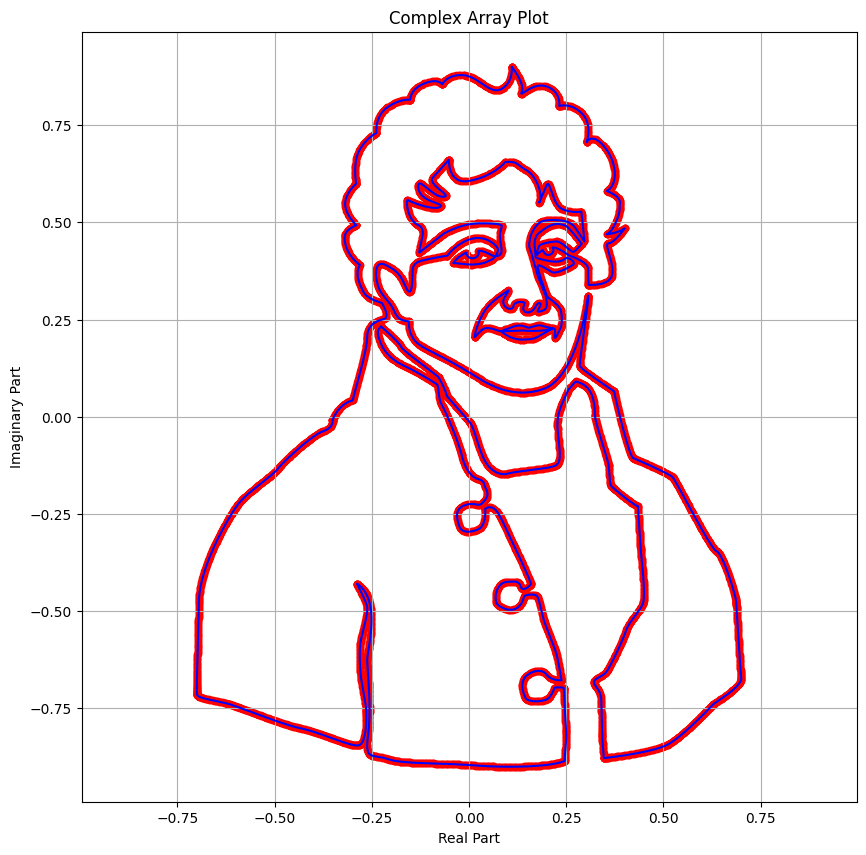

In [11]:
# plot complex array 
import matplotlib.pyplot as plt
import numpy as np

# Extract real and imaginary parts
real_parts = np.real(points)
imag_parts = -np.imag(points)

plt.figure(figsize=(10, 10))
plt.plot(real_parts, imag_parts, 'b-')
plt.scatter(real_parts, imag_parts, c='r', s=20)
plt.title('Complex Array Plot')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.grid(True)
plt.axis('equal')
plt.show()


Discrete Fourier Transformation of Step Function (defined over $[-0.5, 0.5]$, or $P=1$) is 
$$
s(x) = \sum_{n=0}^{\infty} \frac{1}{\pi n} \sin(\pi n x) \cdot e^{2\pi n i x}
$$
where the coefficients are calculated with DFT formula
$$
c_{n} = \int s(x) \cdot e^{-2\pi n i x} dx
$$
Every complex value could be mapped onto a 2D plane, complex exponential such as $e^{i \theta}$ specifically map onto a circle since 
$$
e^{i \theta} = \cos(\theta) + i \sin(\theta)
$$
which is a unit circle. With the discrete fourier series above, we can project the step function as a sum of complex exponentials with different frequencies. 



### Discrete Fourier Transformation (Step Function)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from fourier import dft

num_steps = 1000


# Temporal Array
t = np.linspace(-0.5, 0.5, num_steps)
extend_period = 1
extend_t = np.linspace(-0.5, 0.5 + extend_period * 1.0, num_steps * extend_period)

# Step Function 
step_function = np.where(t < 0, -1, 1)

# Calculate DFT components 
num_freq = 10
cn, signals, folded_signals, fourier_recon = dft(t, step_function, num_freq, extend_time_steps=extend_t)

### Decomposition into signals having different frequencies

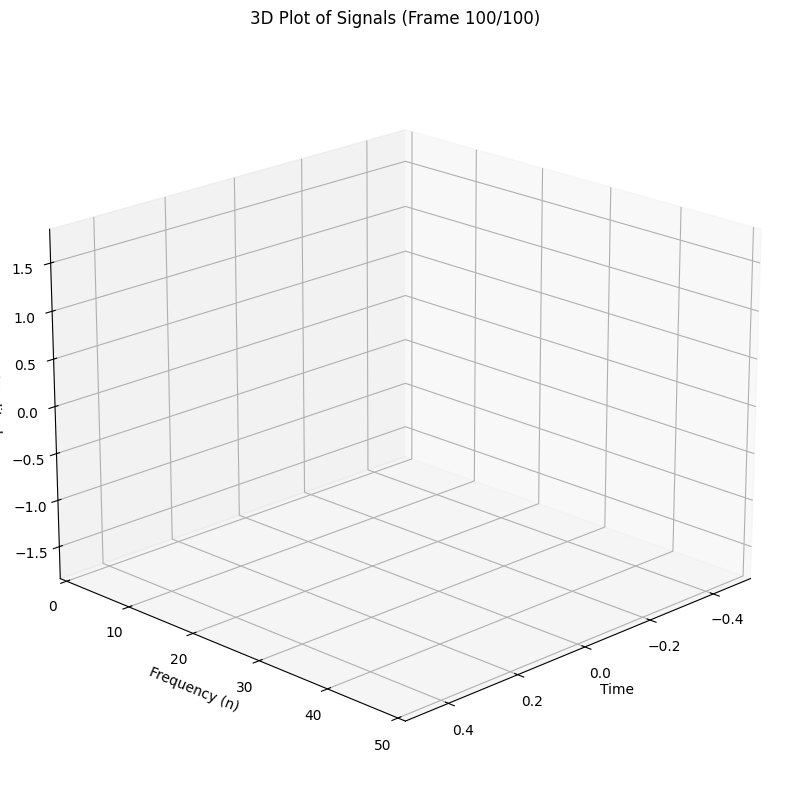

In [13]:
from fourier import animate_approximation_3d
from matplotlib.animation import PillowWriter
anim = animate_approximation_3d(t, folded_signals, step_function)
anim.save('dft_approximation_3d.gif', writer=PillowWriter(fps=5))

# plt.show()

#### Plot SineWave with Circles together 
* Scale positive frequency signals by 2 to draw the wavelet + circle plot

In [4]:
# Circle & Wave Animation with Complex DFT (still on step function)
from fourier import draw_circle_with_wave, animate_circle_with_wave_exp, draw_circle_with_wave_exp

mid_index = len(signals) // 2
positive_freq_signals = signals[mid_index+1:] * 2

y_shift = 2.0
wave_pts = (positive_freq_signals.real, extend_t + y_shift)

# frame_idx = 44
# draw_circle_with_wave_exp(frame_idx, positive_freq_signals, wave_pts)


anim = animate_circle_with_wave_exp(positive_freq_signals, wave_pts, speed_up_factor=5)
from matplotlib.animation import PillowWriter, FFMpegWriter
anim.save('fourier_anime_test.gif', writer=PillowWriter(fps=60))

# anim.save('fourier_anime_test.mp4', writer=FFMpegWriter(fps=60))


#### Added Radius with circles

In [3]:
def draw_circle_with_wave(frame_idx, positive_freq_signals, wave_pts):
    
    K = positive_freq_signals.shape[0]
    signal_pt = positive_freq_signals[:, frame_idx]
    wave_pt = (wave_pts[0][:, frame_idx], wave_pts[1][frame_idx] * np.ones(K))

    # Create the plot
    plt.figure(figsize=(8, 12))

    # Plot circles | Draw circle on the negative side of x-axis suffices (positive circle is the same)
    for k in range(K):
        radius = np.abs(positive_freq_signals[k, 0])
        theta = np.linspace(0, 2*np.pi, 100)
        circle_x = radius * np.cos(theta)
        circle_y = radius * np.sin(theta)
        plt.plot(circle_x, circle_y, color='gray', linestyle='--', label='Circle')

    plt.plot(signal_pt.real, signal_pt.imag, color='green', label='Radius')
    plt.scatter(signal_pt.real, signal_pt.imag, color='red', label='Signal Points')
    plt.scatter(wave_pt[0], wave_pt[1], color='blue', label='Wave Points')
    for r_pt, w_pt in zip(signal_pt, zip(*wave_pt)):
        plt.plot([r_pt.real, w_pt[0]], [r_pt.imag, w_pt[1]], linestyle='--', marker='.', alpha=0.3)

    # Set labels and title
    plt.xlabel('Real Part')
    plt.ylabel('Complex Part')
    plt.title('DFT')

    # Add legend
    plt.legend()

    # Ensure equal aspect ratio
    plt.axis('equal')

    # Add grid
    plt.grid(True)

    # Show the plot
    plt.tight_layout()

    # Show the plot
    plt.show()

#### Animation of Wavelet with Circles

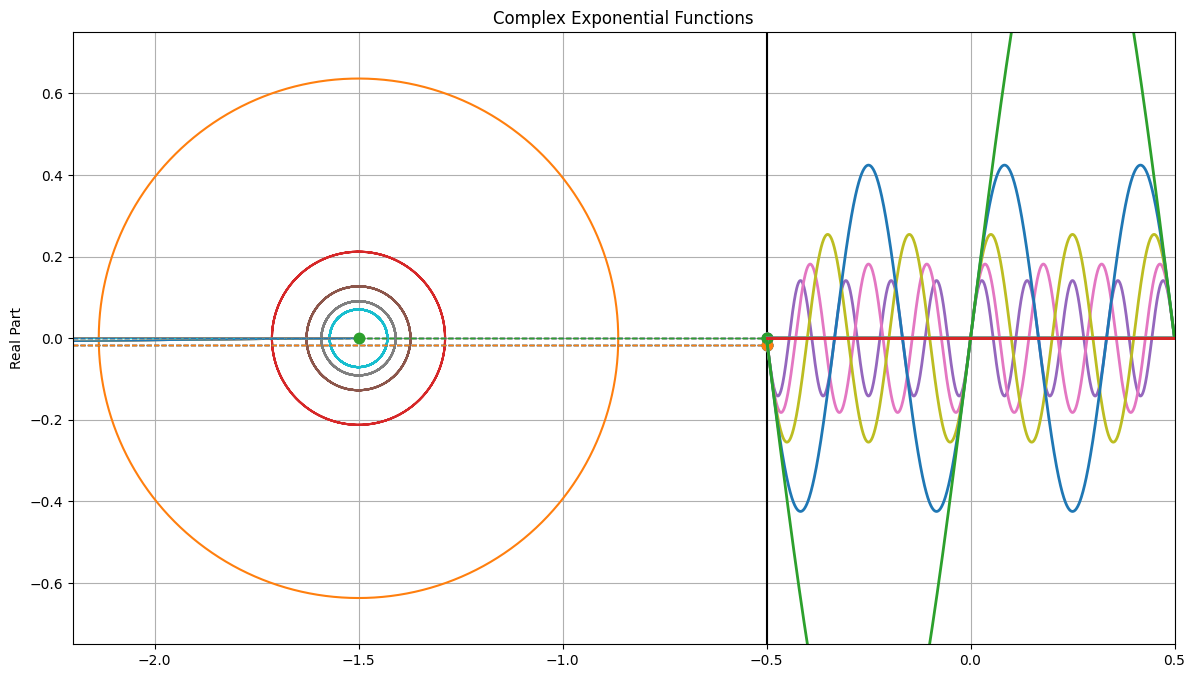

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Create figure and axis
fig, ax = plt.subplots(figsize=(15, 9))
plt.subplots_adjust(bottom=0.2)

# Plot circles
for pts in radius_pts:
    plt.plot(pts.real, pts.imag)

# Plot wavelet starting line
ax.axvline(x=-0.5, color='k')

ax.grid(True)
ax.set_aspect('equal')
ax.set_xlim(-2.2, 0.5)
ax.set_ylim(-0.75, 0.75)
ax.set_ylabel('Real Part')
ax.set_title('Complex Exponential Functions')

# Prepare animated graphics objects | Empty value to be filled in the animation function
K = conjugate_radius_pts.shape[0]
radii = [ax.plot([], [], linewidth=1)[0] for _ in range(K)]
lines = [ax.plot([], [], linewidth=1, linestyle='--', marker='.', markersize=15)[0] for _ in range(K)]
curves = [ax.plot([], [], linewidth=2)[0] for _ in range(K)]

def animate(frame):
    global frame_idx  # Declare frame_idx as global to modify it
    radius_pt = conjugate_radius_pts[:, frame_idx]
    wave_pt = (wave_pts[0][frame_idx] * np.ones_like(wave_pts[1][:, frame_idx]) , wave_pts[1][:, frame_idx])

    for k in range(K):
        radii[k].set_data([-1.5, radius_pt.real[k]], [0, radius_pt.imag[k]])
        lines[k].set_data([radius_pt.real[k], wave_pt[0][k]], [radius_pt.imag[k], wave_pt[1][k]])
        
        curve_x, curve_y = curves[k].get_data()  # curve contains bunch of points
        new_x = np.append(curve_x, wave_pt[0][k])
        new_y = np.append(curve_y, wave_pt[1][k])
        curves[k].set_data(new_x, new_y)

    frame_idx += 1
    if frame_idx >= len(t):  # Reset frame_idx if it exceeds the number of frames
        frame_idx = 0
    return radii + lines + curves

# Initialize frame_idx outside the animate function
frame_idx = 0

# Create animation
anim = FuncAnimation(fig, animate, frames=num_steps, interval=20, blit=True)

# plt.show()

# Uncomment the following lines to save the animation as a GIF
from matplotlib.animation import PillowWriter
anim.save('fourier_anime.gif', writer=PillowWriter(fps=50))




#### DFT with radius and sine waves (Animate over temporal dimension)

In [50]:
def fold_up_negative_freq(radius_pts):
    
    # Fold-up conjugate pairs 
    mid_index = len(signals) // 2
    is_odd = len(signals) % 2 != 0

    if is_odd:
        radius_pts[:mid_index] += radius_pts[-1:mid_index:-1]
        # Keep the middle value unchanged
    else:
        radius_pts[:mid_index] += radius_pts[:mid_index-1:-1]

    # Truncate the array to keep only the first half
    radius_pts = radius_pts[:mid_index + is_odd]
    
    return radius_pts


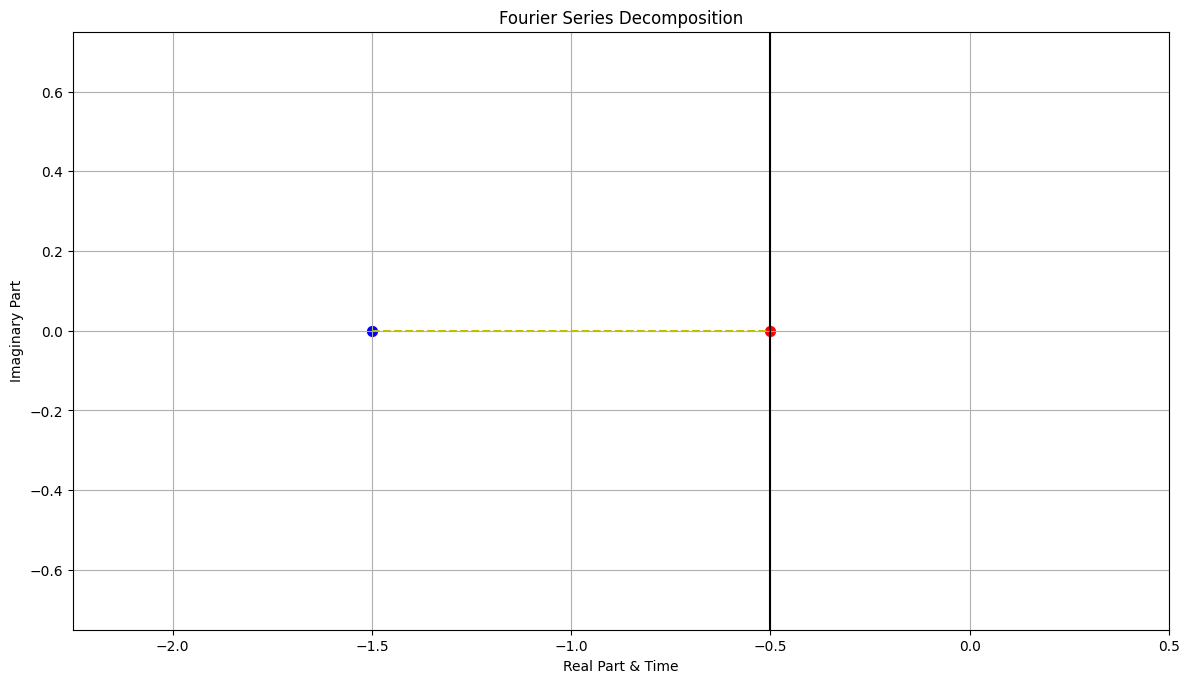

In [51]:
# Circle & Wave Animation with Complex DFT (still on step function)


x_shift = 1.5
radius = 0.5
xmin = -2 * radius

# Calculate Radius Start & End Points
radius_pts = signals.imag + (signals.real) * 1j  # Non-Shifted Radius Points for each frequency
radius_pts = fold_up_negative_freq(radius_pts)

end_radius_pts = np.cumsum(radius_pts, axis=0) - x_shift
start_radius_pts = np.copy(radius_pts) - x_shift
start_radius_pts[1:] = end_radius_pts[:-1]

# Wave account for the sum of DFT
sum_radius_pts = (signals.sum(axis=0).imag - x_shift) + (signals.sum(axis=0).real) * 1j  # Sum complex exponentials with DFT
wave_pts = (t, sum_radius_pts.imag)

radius_pt_start = start_radius_pts[:, 0]  # form the radius for the first time step
radius_pt_end = end_radius_pts[:, 0]
wave_pt = (wave_pts[0][0], wave_pts[1][0])

import matplotlib.pyplot as plt
import numpy as np

# Create the plot
plt.figure(figsize=(12, 8))

# Plot wavelet starting line
plt.axvline(x=-0.5, color='k')

# Plot lines between start and end radius points for each frequency
for start, end in zip(radius_pt_start, radius_pt_end):
    plt.plot([start.real, end.real], [start.imag, end.imag], 'y--')

# Plot wave point
plt.scatter(wave_pt[0], wave_pt[1], color='red', s=50)

# Connect last radius point to wave point
plt.plot([radius_pt_end[-1].real, wave_pt[0]], [radius_pt_end[-1].imag, wave_pt[1]], 'y--')
plt.scatter(radius_pt_end[-1].real, radius_pt_end[-1].imag, color='blue', s=50)

# Set labels and title
plt.xlabel('Real Part & Time')
plt.ylabel('Imaginary Part')
plt.title('Fourier Series Decomposition')

# Set limits and ensure equal aspect ratio
ax = plt.gca()
ax.set_xlim(-2.25, 0.5)
ax.set_ylim(-0.75, 0.75)
ax.set_aspect('equal', adjustable='box')

# Add grid
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

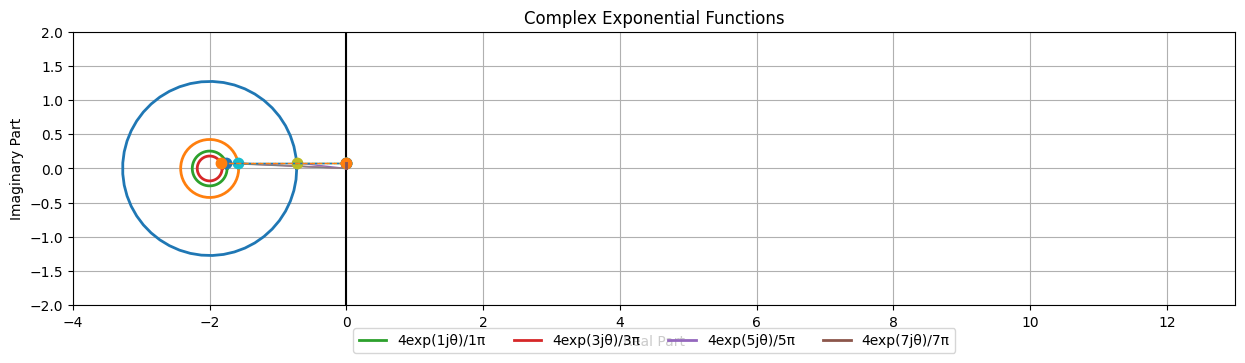

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Animation params
periods = 2 # Should be 2 pi instead here
num_steps = 100 * periods

# Circles
freq = np.array([1, 3, 5, 7])
r = 4 / (freq * np.pi) # this is the calculated coef for real part of fourier series (we don't do this, too dumb)
K = len(freq) # Numer of decomposed signals (number of frequencies)
R = np.max(r)
bounds = np.ceil(R)

# Create figure and axis
fig, ax = plt.subplots(figsize=(15, 9))
plt.subplots_adjust(bottom=0.2)

# Plot circles
t = np.linspace(0, 2*np.pi, 50)
for i in range(K):
    circle = r[i] * np.exp(1j * t) - bounds
    ax.plot(circle.real, circle.imag, linewidth=2)

# Plot y=0 axis
ax.axvline(x=0, color='k')

ax.grid(True)
ax.set_aspect('equal')
ax.set_xlim(-2*bounds, np.ceil(2*np.pi*periods))
ax.set_ylim(-bounds, bounds)
ax.set_xlabel('Real Part')
ax.set_ylabel('Imaginary Part')
ax.set_title('Complex Exponential Functions')

# Prepare animated graphics objects | Empty value to be filled in the animation function
radii = [ax.plot([], [], linewidth=1)[0] for _ in range(K)]
lines = [ax.plot([], [], linewidth=1, linestyle='--', marker='.', markersize=15)[0] for _ in range(K)]
curves = [ax.plot([], [], linewidth=2)[0] for _ in range(K)]

# Legend
legend_labels = [f'4exp({f}jθ)/{f}π' for f in freq]
ax.legend(curves, legend_labels, loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=K)

# Animation function
xx = np.linspace(0, 2*np.pi*periods, num_steps)
theta = np.zeros(K)
step = (xx[1] - xx[0]) * freq

def animate(frame):
    for k in range(K):
        # r is the radius of the projected complex exponential (circle), theta is angle at k-th step (not sure if the radiue change or not here ...)
        # Although radiue does not change (within a frequency signal), we are vectorizing all the frequences at once, k is the index of the frequency
        
        z = r[k] * np.exp(1j * theta[k]) # Complex Exponential I guess first dimension is frequencies (not sure) | This must be the radius of the circle
        # ok, note that here z.real is subtracted by bounds (horizonal shift of sorts)
        # Shift is to ensure end of radiue never go out of bounds (bounds = R, min(z.real)=-R, xmin=-2R)
        # - The display here put circle & radius on the negative side of x-axis (z.real - bounds < 0) without going out of bounds (z.real - bounds > xmin = -2R)
        # - Lines connect radius to the sine wave
        lines[k].set_data([z.real - bounds, xx[frame]], [z.imag, z.imag]) # connecting line between circle and sine wave
        radii[k].set_data([0, z.real - bounds], [0, z.imag])
        
        curve_x, curve_y = curves[k].get_data() # curve contains bunch of points
        new_x = np.append(curve_x, xx[frame])
        new_y = np.append(curve_y, z.imag)
        curves[k].set_data(new_x, new_y)
    
    # Note: the beauty here is that throughout the entire animation, angles on each frequency signal is the ONLY changing thing ... (!)
    theta[:] += step # update angle for next time-step (frame)
    return radii + lines + curves

# Create animation
anim = FuncAnimation(fig, animate, frames=num_steps, interval=20, blit=True)

plt.show()

# # Uncomment the following lines to save the animation as a GIF
# from matplotlib.animation import PillowWriter
# anim.save('complex_fourier_series.gif', writer=PillowWriter(fps=50))